# Import Library

In [1]:
#import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.utils import resample

from sklearn.linear_model import LogisticRegression # Logistic Regression
from sklearn.tree import DecisionTreeClassifier # Decision Tree
from sklearn.ensemble import RandomForestClassifier # Random Forest
from sklearn.naive_bayes import GaussianNB  # Naive Bayes
from sklearn.neighbors import KNeighborsClassifier  # K-Nearest Neighbor
from sklearn.neural_network import MLPClassifier # Neural Network

from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score
# %matplotlib inline

pd.set_option("display.max_columns", 100)
pd.set_option("display.max_rows", 100)
pd.set_option("display.max_colwidth", 1000)

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df_train = pd.read_csv('/content/drive/MyDrive/HCI_Rakamin/application_train.csv')
df_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,...,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,...,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,...,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,NaN,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,NaN,0.650442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single /

# Data Cleaning

In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [5]:
df_train.NAME_CONTRACT_TYPE.value_counts()

Cash loans         278232
Revolving loans     29279
Name: NAME_CONTRACT_TYPE, dtype: int64

In [6]:
Marital_status = []
married = ['Married', 'Civil marriage']

for i in df_train.NAME_FAMILY_STATUS:
    if i in married:
        Marital_status.append('Married')
    else:
        Marital_status.append('Unmarried')

In [7]:
Occupation_type = []
blue_collars = ['Laborers', 'Drivers', 'Cooking staff', 'Cleaning staff', 'Low-skill Laborers', 'Waiters/barmen staff']
sales_service = ['Sales staff',' Private service staff', 'Realty agents',' Secretaries', 'HR staff']

for i in df_train.OCCUPATION_TYPE:
    if i in blue_collars:
        Occupation_type.append('Blue-Collars')
    elif i in sales_service:
        Occupation_type.append('Sales and Service')
    elif i == "Managers":
        Occupation_type.append('Management')
    elif i == "Security staff":
        Occupation_type.append('Security and Support')
    else:
        Occupation_type.append('Professional and Technical')

In [8]:
category_mapping = {
    'Business Entity Type 3': 'Corporate',
    'XNA': 'Unknown',
    'Self-employed': 'Individual',
    'Other': 'Other',
    'Medicine': 'Healthcare',
    'Business Entity Type 2': 'Corporate',
    'Government': 'Government',
    'School': 'Education',
    'Trade: type 7': 'Trade',
    'Kindergarten': 'Education',
    'Construction': 'Construction',
    'Business Entity Type 1': 'Corporate',
    'Transport: type 4': 'Transportation',
    'Trade: type 3': 'Trade',
    'Industry: type 9': 'Industry',
    'Industry: type 3': 'Industry',
    'Security': 'Security',
    'Housing': 'Real Estate',
    'Industry: type 11': 'Industry',
    'Military': 'Government',
    'Bank': 'Finance',
    'Agriculture': 'Industry',
    'Police': 'Government',
    'Transport: type 2': 'Transportation',
    'Postal': 'Transportation',
    'Security Ministries': 'Security',
    'Trade: type 2': 'Trade',
    'Restaurant': 'Hospitality',
    'Services': 'Other',
    'University': 'Education',
    'Industry: type 7': 'Industry',
    'Transport: type 3': 'Transportation',
    'Industry: type 1': 'Industry',
    'Hotel': 'Hospitality',
    'Electricity': 'Utilities',
    'Industry: type 4': 'Industry',
    'Trade: type 6': 'Trade',
    'Industry: type 5': 'Industry',
    'Insurance': 'Finance',
    'Telecom': 'Technology',
    'Emergency': 'Government',
    'Industry: type 2': 'Industry',
    'Advertising': 'Marketing',
    'Realtor': 'Real Estate',
    'Culture': 'Other',
    'Industry: type 12': 'Industry',
    'Trade: type 1': 'Trade',
    'Mobile': 'Technology',
    'Legal Services': 'Legal',
    'Cleaning': 'Services',
    'Transport: type 1': 'Transportation',
    'Industry: type 6': 'Industry',
    'Industry: type 10': 'Industry',
    'Religion': 'Other',
    'Industry: type 13': 'Industry',
    'Trade: type 4': 'Trade',
    'Trade: type 5': 'Trade',
    'Industry: type 8': 'Industry'
}

In [9]:
df_train['CODE_GENDER'] = df_train['CODE_GENDER'].replace('XNA', 'F')
df_train['NAME_INCOME_TYPE'] = df_train['NAME_INCOME_TYPE'].replace(['Unemployed','Student','Businessman','Maternity leave'], 'Other')
df_train['DAYS_BIRTH'] = df_train['DAYS_BIRTH'].abs()
df_train['DAYS_EMPLOYED'] = df_train['DAYS_EMPLOYED'].abs()
df_train['DAYS_REGISTRATION'] = df_train['DAYS_REGISTRATION'].abs()
df_train['DAYS_ID_PUBLISH'] = df_train['DAYS_ID_PUBLISH'].abs()
df_train['DAYS_LAST_PHONE_CHANGE'] = df_train['DAYS_LAST_PHONE_CHANGE'].abs()
df_train['NAME_FAMILY_STATUS'] = Marital_status
df_train['OCCUPATION_TYPE'] = Occupation_type
df_train['ORGANIZATION_TYPE'] = df_train['ORGANIZATION_TYPE'].map(category_mapping)

In [10]:
df_train['AGE']=df_train['DAYS_BIRTH']/365

In [11]:
age_cat = []
for i in df_train['AGE']:
    if i < 36:
        age_cat.append('Young Adult')
    elif i < 51:
        age_cat.append('Adult')
    else:
        age_cat.append('Older')

In [12]:
df_train['AGE'] = age_cat

In [13]:
df_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,...,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Unmarried,House / apartment,0.018801,9461,637,3648.0,2120,NaN,1,1,0,1,1,0,Blue-Collars,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Corporate,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,...,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,Young Adult
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,NaN,1,1,0,1,1,0,Professional and Technical,2.0,1,1,MONDAY,11,0,0,0,0,0,0,Education,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,...,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,Adult
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Unmarried,House / apartment,0.010032,19046,225,4260.0,2531,26.0,1,1,1,1,1,0,Blue-Collars,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,Older
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.008019,19005,3039,9833.0,2437,NaN,1,1,0,1,0,0,Blue-Collars,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Corporate,NaN,0.650442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,Older
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Unmarried,House / apartment,0.028663,19932,3038,4311.0,3

# Data Exploration

In [14]:
def percent(axx):
    all_heights = [[p.get_height() for p in bars] for bars in axx.containers]
    for bars in axx.containers:
        for i, p in enumerate(bars):
            total = sum(xgroup[i] for xgroup in all_heights)
            percentage = (100 * p.get_height() / total) if total != 0 else 0  # Avoid division by zero
            axx.annotate(f'{percentage:.1f}%', (p.get_x() + p.get_width() / 2, p.get_height()), size=11, ha='center', va='bottom')

In [15]:
# Set Seaborn theme
sns.set_theme(style="whitegrid")

title_style = dict(size=20, weight="bold")

def count_plot(df, x_col, main_title, ax=None, **plot_args):
    counts = df[x_col].value_counts()
    percentages = counts / counts.sum()
    percentages_str = percentages.apply("{:.1%}".format)

    plt.title(main_title, fontdict=title_style)
    ax = sns.countplot(data=df, x=x_col, order=counts.index, ax=ax, **plot_args)
    plt.ylabel("")

    # Add percentage labels
    for i, p in enumerate(ax.patches):
        percentage_label = f"{percentages_str[i]}"
        ax.text(p.get_x() + p.get_width() / 2, p.get_height(), percentage_label, ha='center', va='bottom')

    return ax


def scatter_plot(df, x_col, y_col, hue_col, main_title, **plot_args):
    plt.figure(figsize=(12, 6))
    plt.title(main_title, fontdict=title_style)
    sns.scatterplot(data=df, x=x_col, y=y_col, hue=hue_col, **plot_args)
    plt.xlabel(x_col)
    plt.ylabel(hue_col)
    plt.show()


def distribution_plot(df, x_col, hue, main_title, ax=None, **plot_args):
    if ax is None:
        fig, ax = plt.subplots(figsize=(12, 6))

    if hue is not None:
        # Create separate histograms for each hue value
        for hue_value in df[hue].unique():
            subset = df[df[hue] == hue_value]
            sns.histplot(data=subset, x=x_col, kde=True, label=f'{hue_value}', ax=ax, **plot_args)

        ax.legend(title=hue)
    else:
        sns.histplot(data=df, x=x_col, kde=True, ax=ax, **plot_args)

    ax.set_title(main_title, fontdict=title_style)
    plt.ylabel("")
    ax

def box_plot(df, x_col, y_col, main_title, **plot_args):
    plt.title(main_title, fontdict=title_style)
    sns.boxplot(data=df, x=x_col, y=y_col, **plot_args)
    plt.ylabel("")
    plt.show()

def compare_bar_plot(df, x_col, hue, main_title, ax=None, **plot_args):
    ax = sns.countplot(x=x_col, data = df, hue = hue, ax=ax)
    ax.set_title(main_title, fontdict=title_style)
    plt.ylabel("")
    percent(ax)
    return ax

## Client Repayment Status

In [16]:
desc = {0: "Client with Loan Repayed", 1: "Client with Loan Not Repayed"}
df_train['TARGET'] = df_train['TARGET'].map(desc)
target_desc = df_train['TARGET'].value_counts().reset_index()
target_desc.columns = ['TARGET', 'COUNT']
target_desc = target_desc.sort_values(by='COUNT', ascending=False)
target_desc.style.background_gradient()

,TARGET,COUNT
0,Client with Loan Repayed,282686
1,Client with Loan Not Repayed,24825


<Axes: title={'center': 'Client Repayment Status'}, xlabel='TARGET'>

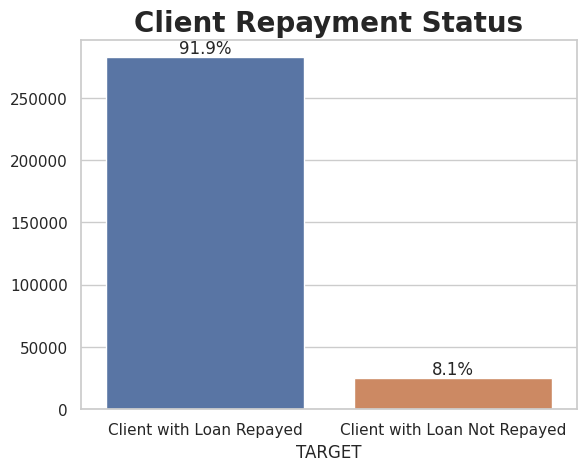

In [17]:
count_plot(df_train, x_col='TARGET', main_title="Client Repayment Status")

### Categorized by Gender, Car Ownership, Realty Ownership, and Contract Type



<Axes: title={'center': 'Client Repayment Status by Contract Type'}, xlabel='NAME_CONTRACT_TYPE'>

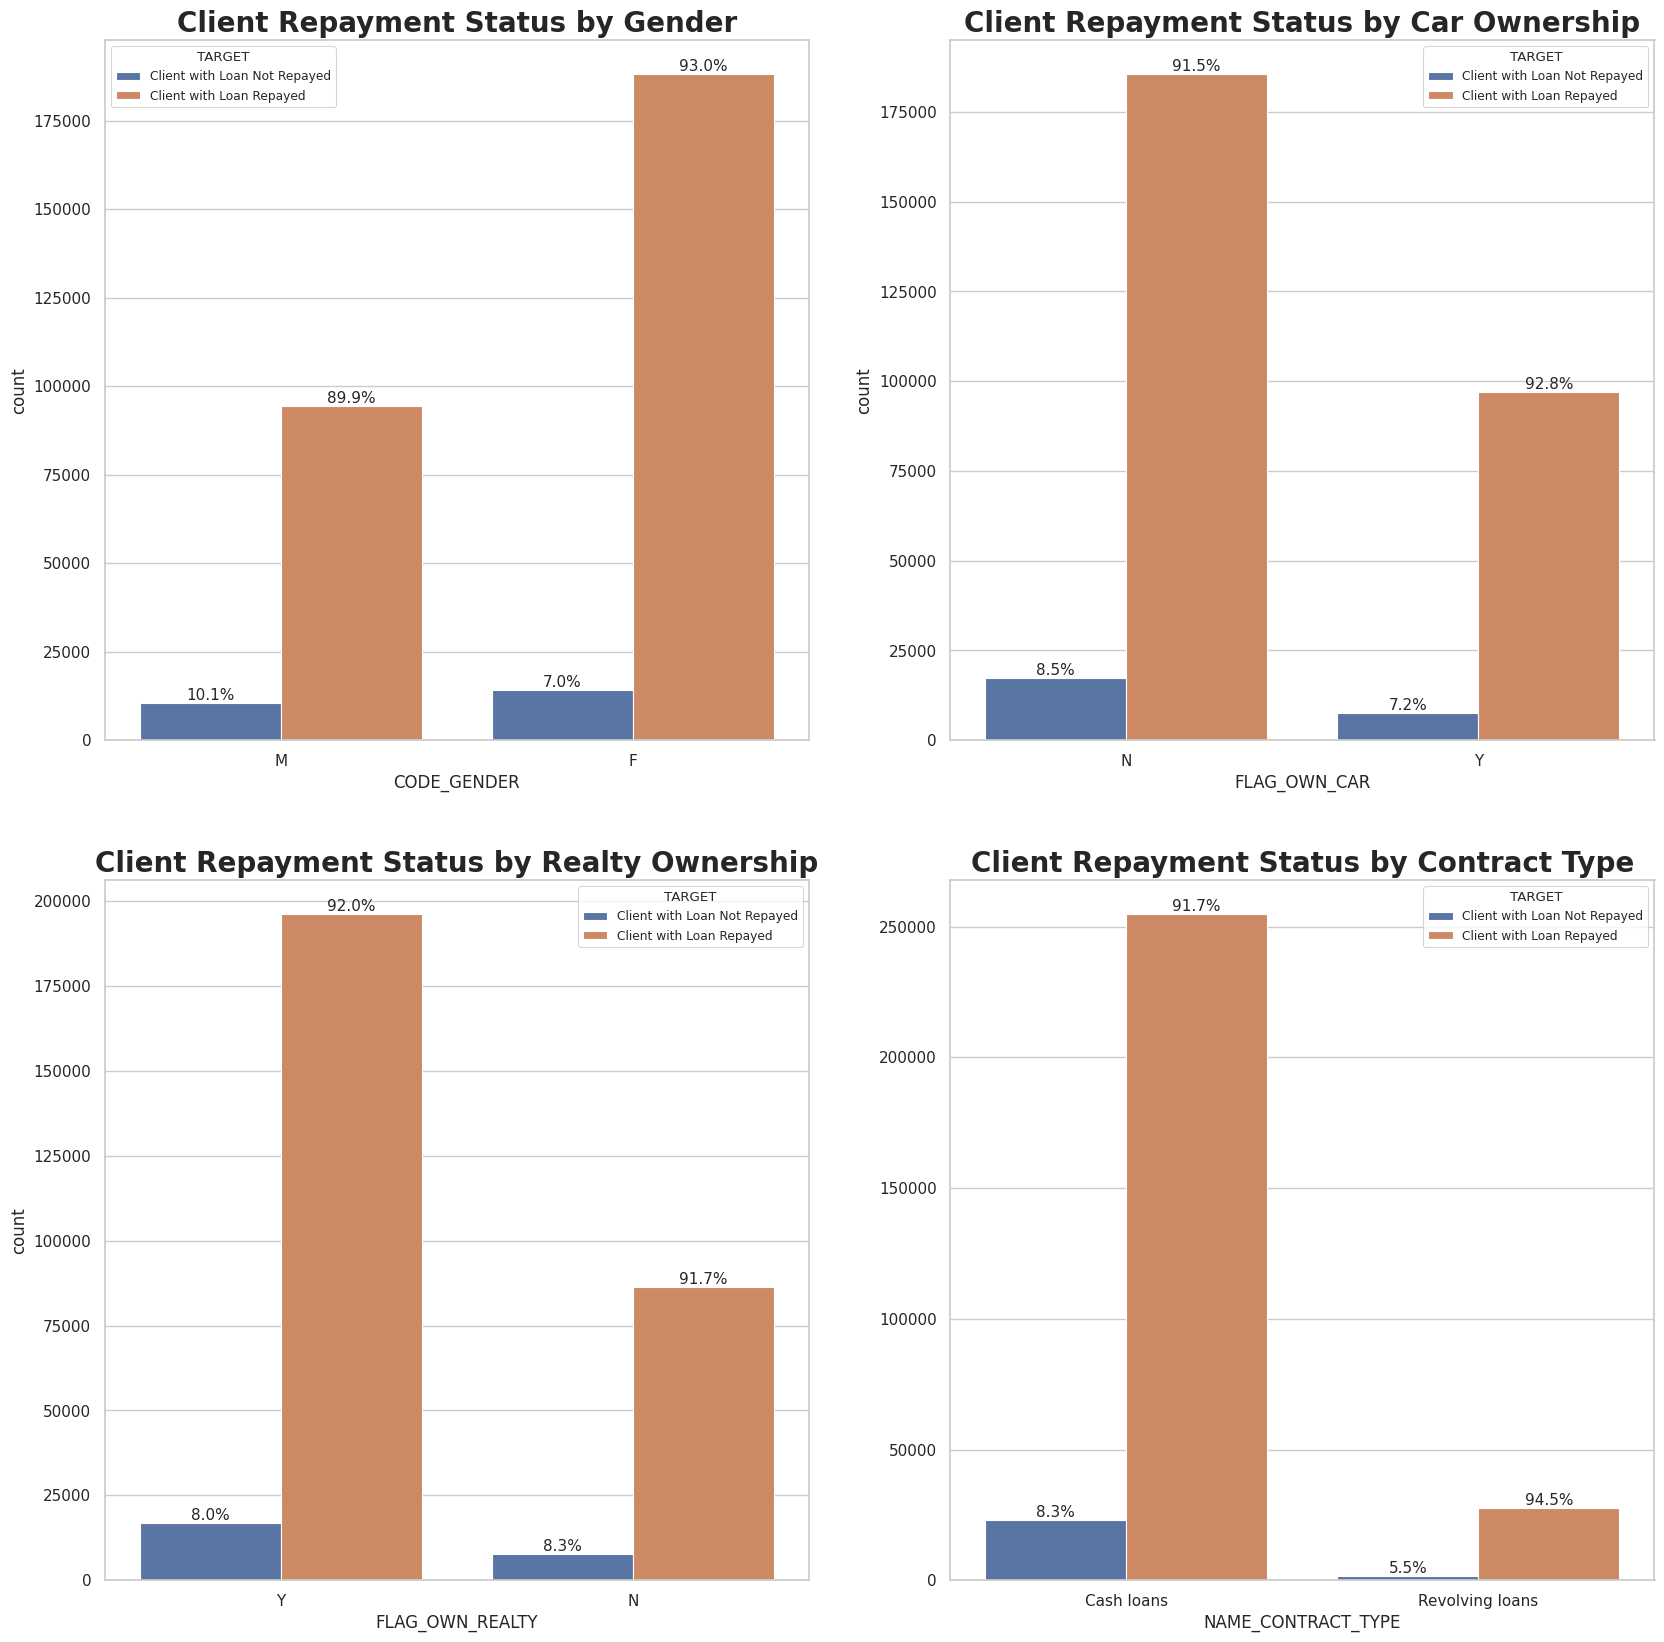

In [18]:
sns.set_style('whitegrid')
fig, ax = plt.subplots(2,2, figsize=(20,20))
sns.set_context('paper', font_scale=1)

compare_bar_plot(df_train, x_col='CODE_GENDER', hue='TARGET', main_title="Client Repayment Status by Gender", ax=ax[0][0])
compare_bar_plot(df_train, x_col='FLAG_OWN_CAR', hue='TARGET', main_title="Client Repayment Status by Car Ownership", ax=ax[0][1])
compare_bar_plot(df_train, x_col='FLAG_OWN_REALTY', hue='TARGET', main_title="Client Repayment Status by Realty Ownership", ax=ax[1][0])
compare_bar_plot(df_train, x_col='NAME_CONTRACT_TYPE', hue='TARGET', main_title="Client Repayment Status by Contract Type", ax=ax[1][1])

### Categorized by Age, Job, Marital Status, and Occupation Type

<Axes: title={'center': 'Client Repayment Status by Occupation Type'}, xlabel='OCCUPATION_TYPE'>

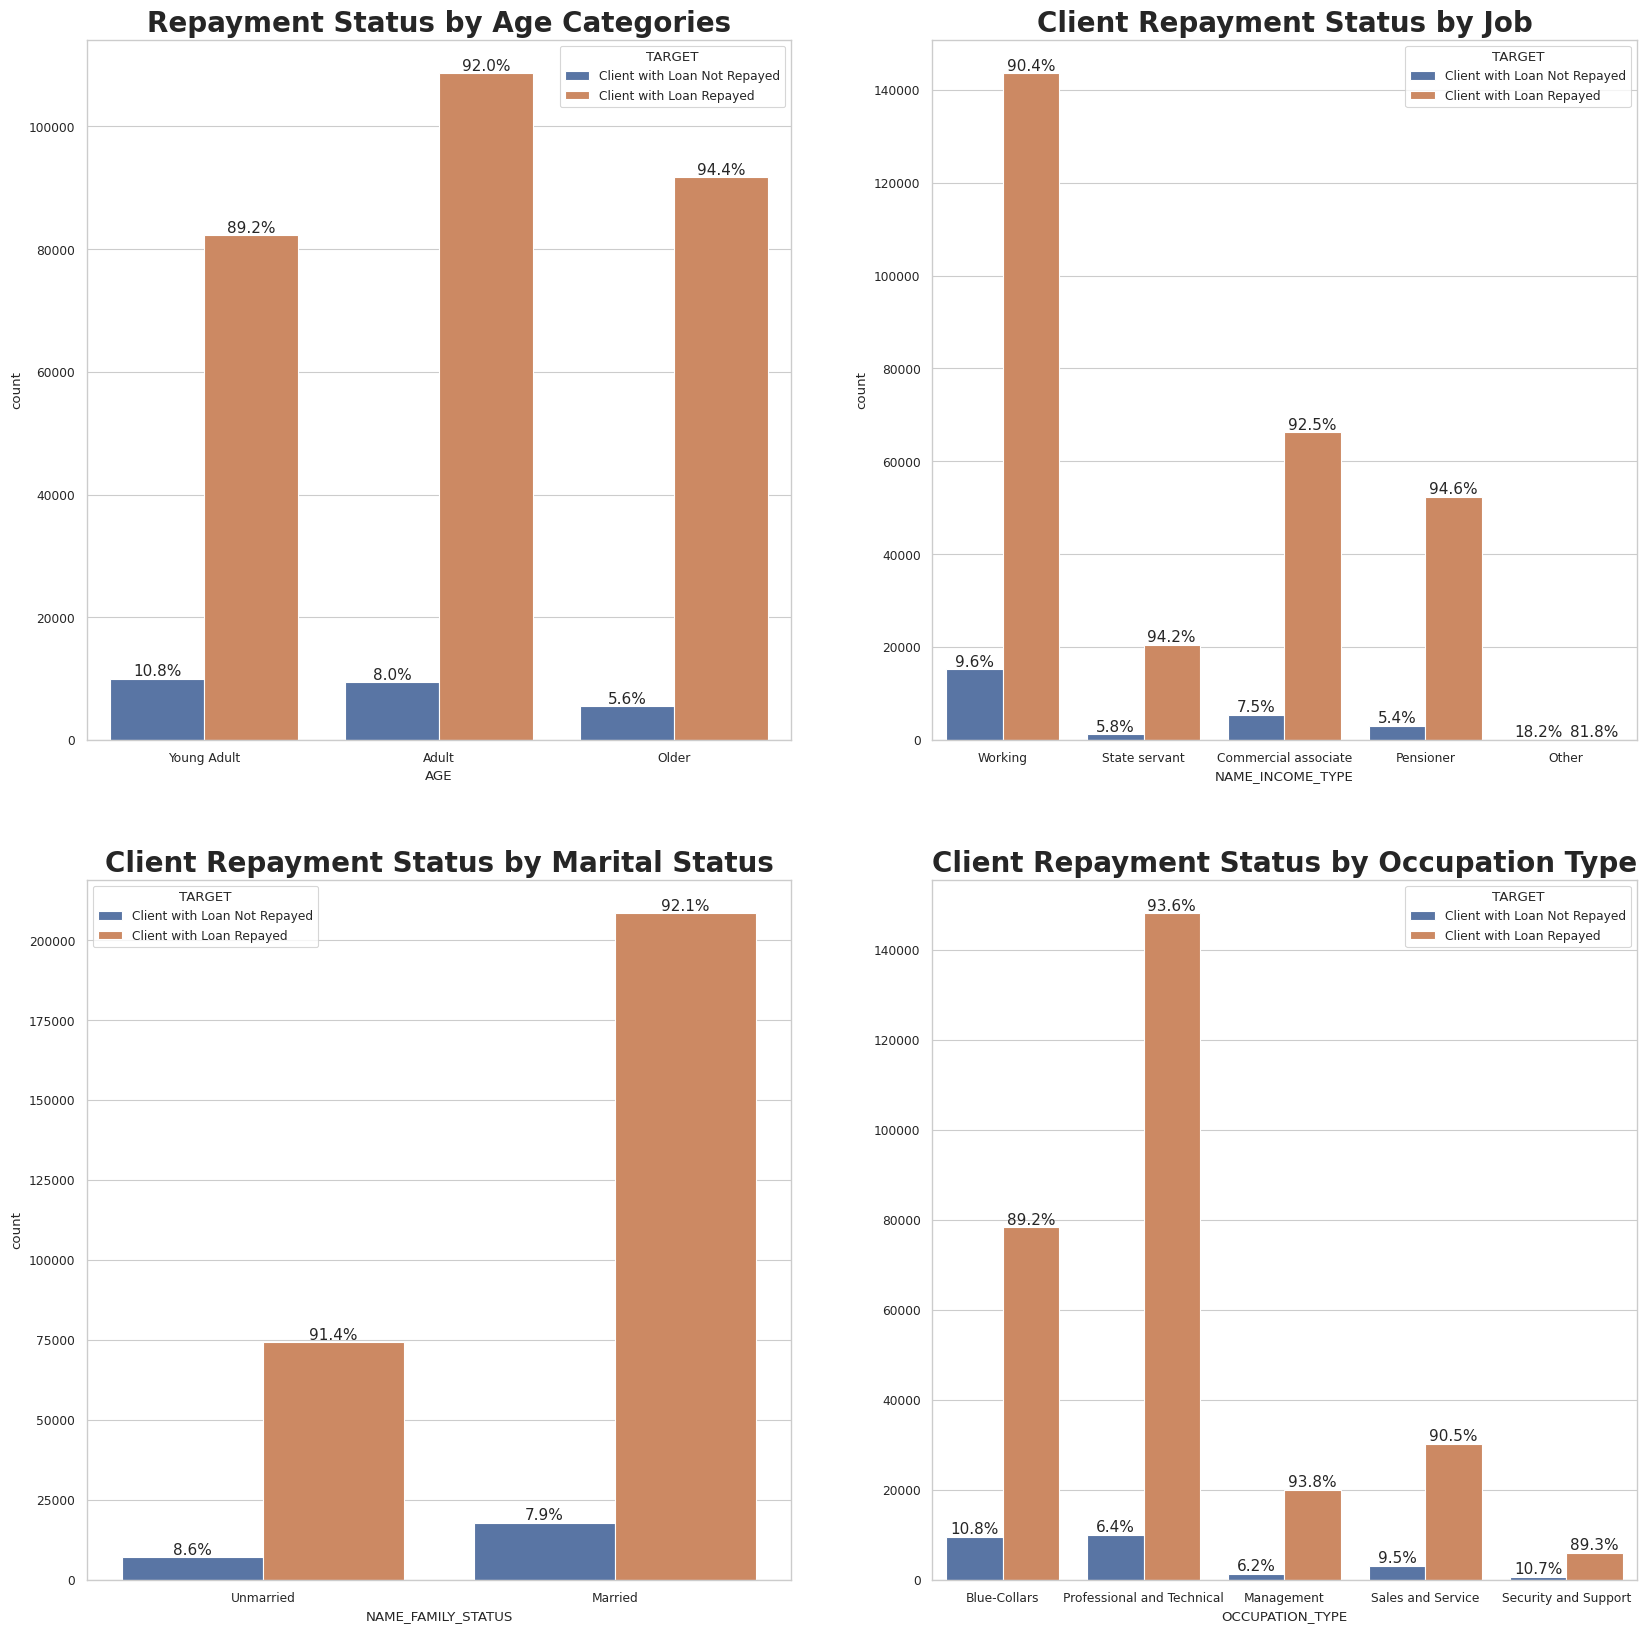

In [19]:
sns.set_style('whitegrid')
fig, ax = plt.subplots(2,2, figsize=(20,20))
sns.set_context('paper', font_scale=1)

compare_bar_plot(df_train, x_col='AGE', hue='TARGET', main_title="Repayment Status by Age Categories", ax = ax[0][0])
compare_bar_plot(df_train, x_col='NAME_INCOME_TYPE', hue='TARGET', main_title="Client Repayment Status by Job", ax = ax[0][1])
compare_bar_plot(df_train, x_col='NAME_FAMILY_STATUS', hue='TARGET', main_title="Client Repayment Status by Marital Status", ax = ax[1][0])
compare_bar_plot(df_train, x_col='OCCUPATION_TYPE', hue='TARGET', main_title="Client Repayment Status by Occupation Type", ax = ax[1][1])

### Categorized by Organization Type

[Text(0, 0, 'Corporate'),
 Text(1, 0, 'Education'),
 Text(2, 0, 'Government'),
 Text(3, 0, 'Other'),
 Text(4, 0, 'Unknown'),
 Text(5, 0, 'Utilities'),
 Text(6, 0, 'Healthcare'),
 Text(7, 0, 'Individual'),
 Text(8, 0, 'Transportation'),
 Text(9, 0, 'Construction'),
 Text(10, 0, 'Real Estate'),
 Text(11, 0, 'Trade'),
 Text(12, 0, 'Industry'),
 Text(13, 0, 'Security'),
 Text(14, 0, 'Hospitality'),
 Text(15, 0, 'Finance'),
 Text(16, 0, 'Technology'),
 Text(17, 0, 'Legal'),
 Text(18, 0, 'Marketing'),
 Text(19, 0, 'Services')]

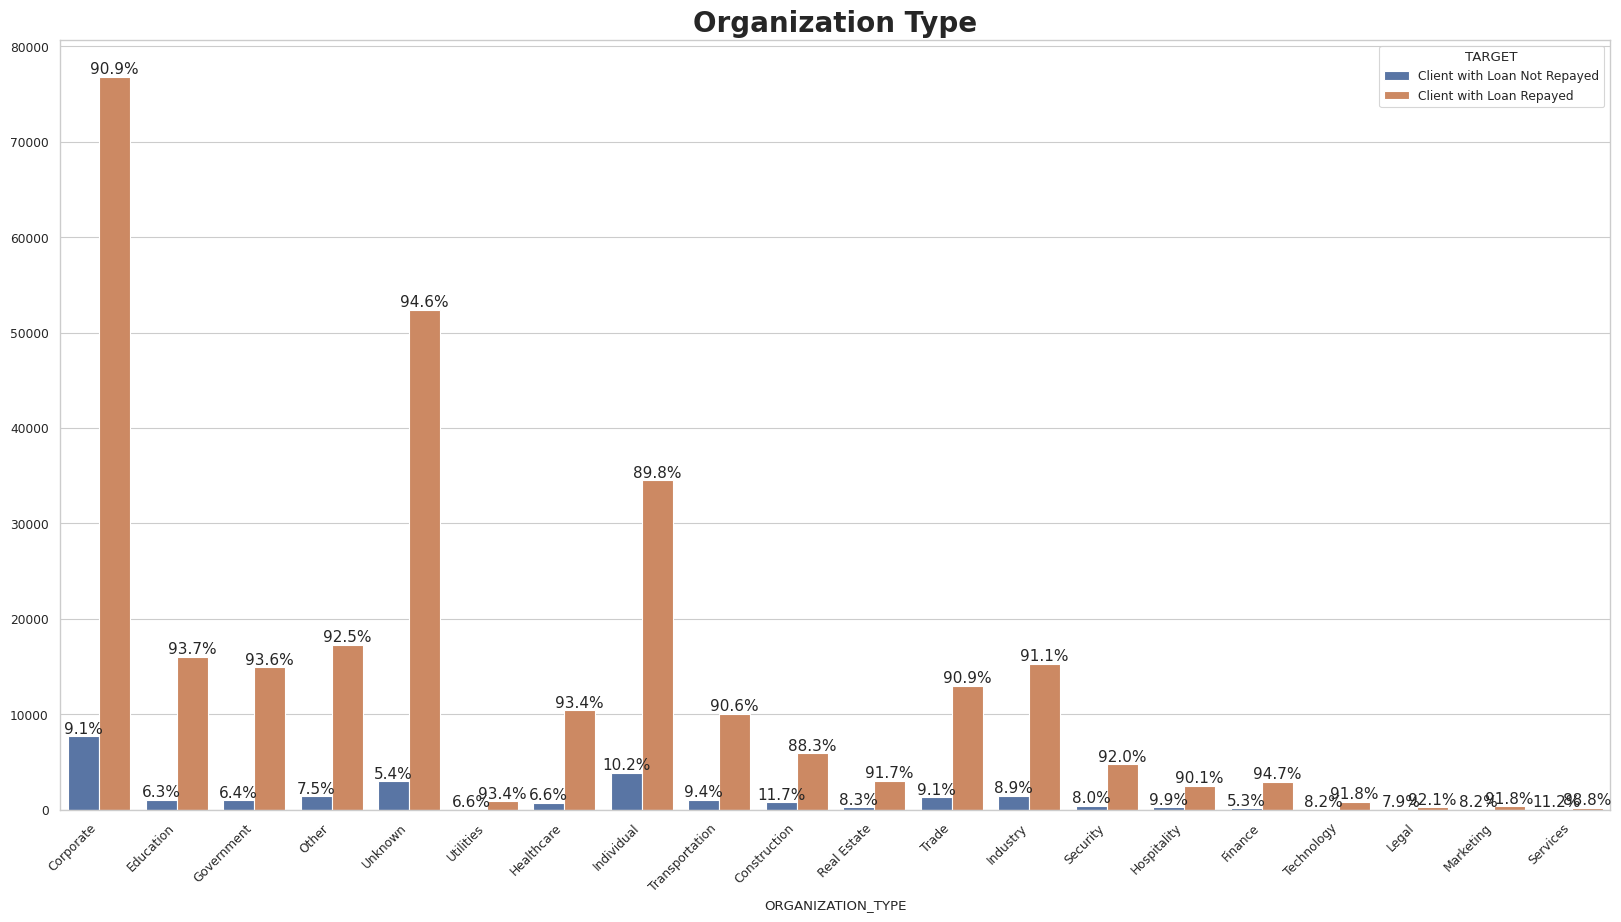

In [20]:
sns.set_style('whitegrid')
plt.figure(figsize=(20,10))

ax = compare_bar_plot(df_train, x_col='ORGANIZATION_TYPE', hue='TARGET', main_title="Organization Type")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')  # Rotate the x-axis labels

### Categorized by Children Amount

<Axes: title={'center': 'Client Repayment Status by Children Amount'}, xlabel='CNT_CHILDREN'>

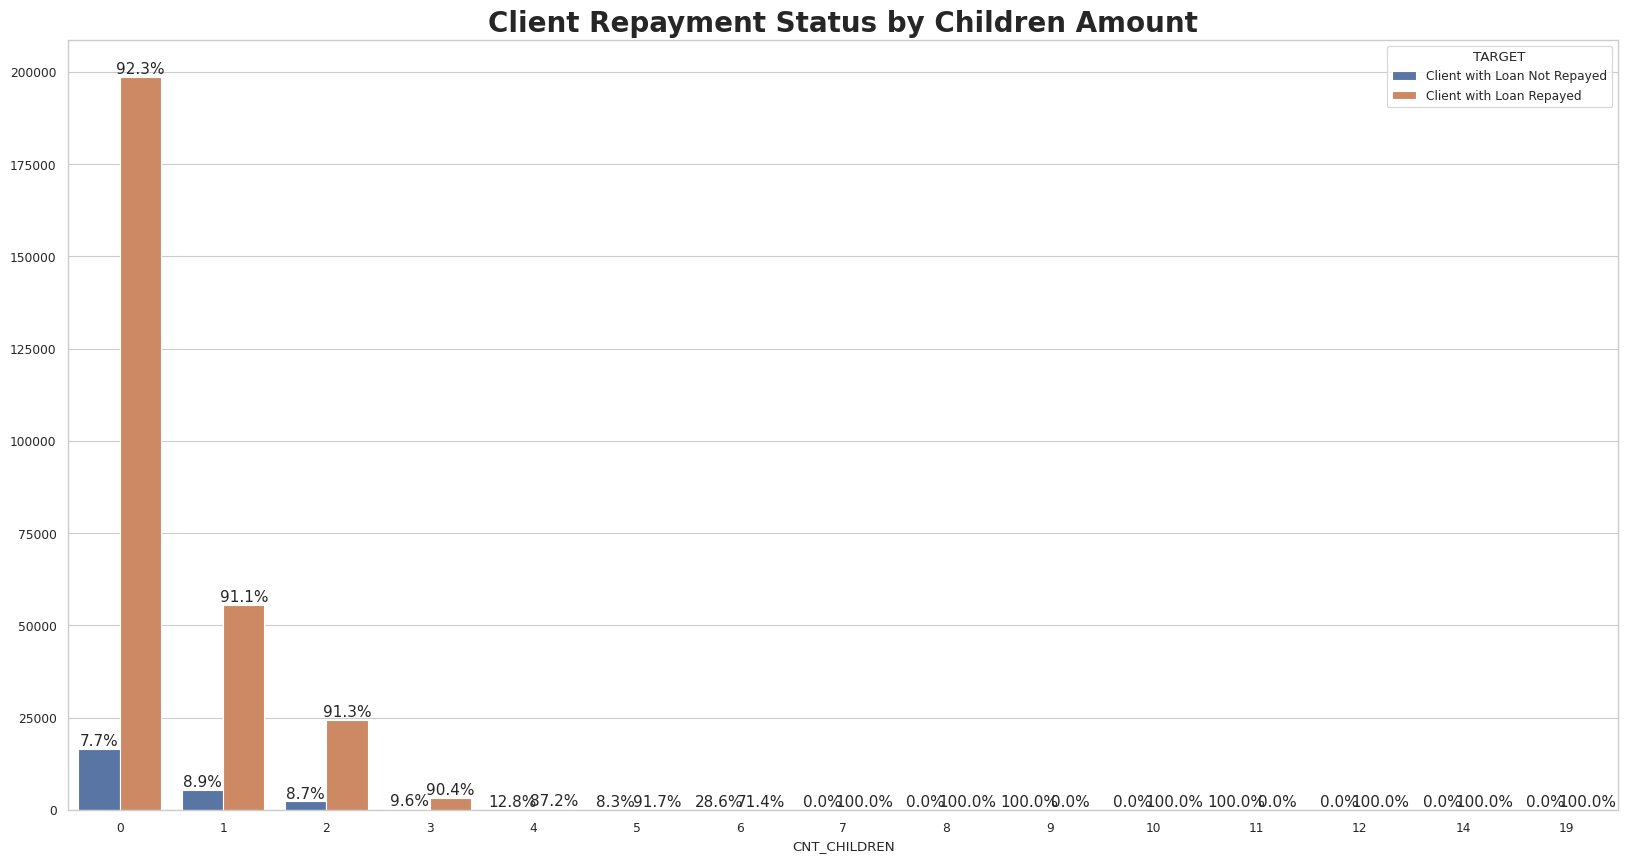

In [21]:
sns.set_style('whitegrid')
plt.figure(figsize=(20, 10))

compare_bar_plot(df_train,x_col='CNT_CHILDREN',hue='TARGET',main_title="Client Repayment Status by Children Amount")

### Categorized by Suite, Education, Housing Type, and Number of Family Members

<Axes: title={'center': 'Client Repayment Status by Count of Family Members'}, xlabel='CNT_FAM_MEMBERS'>

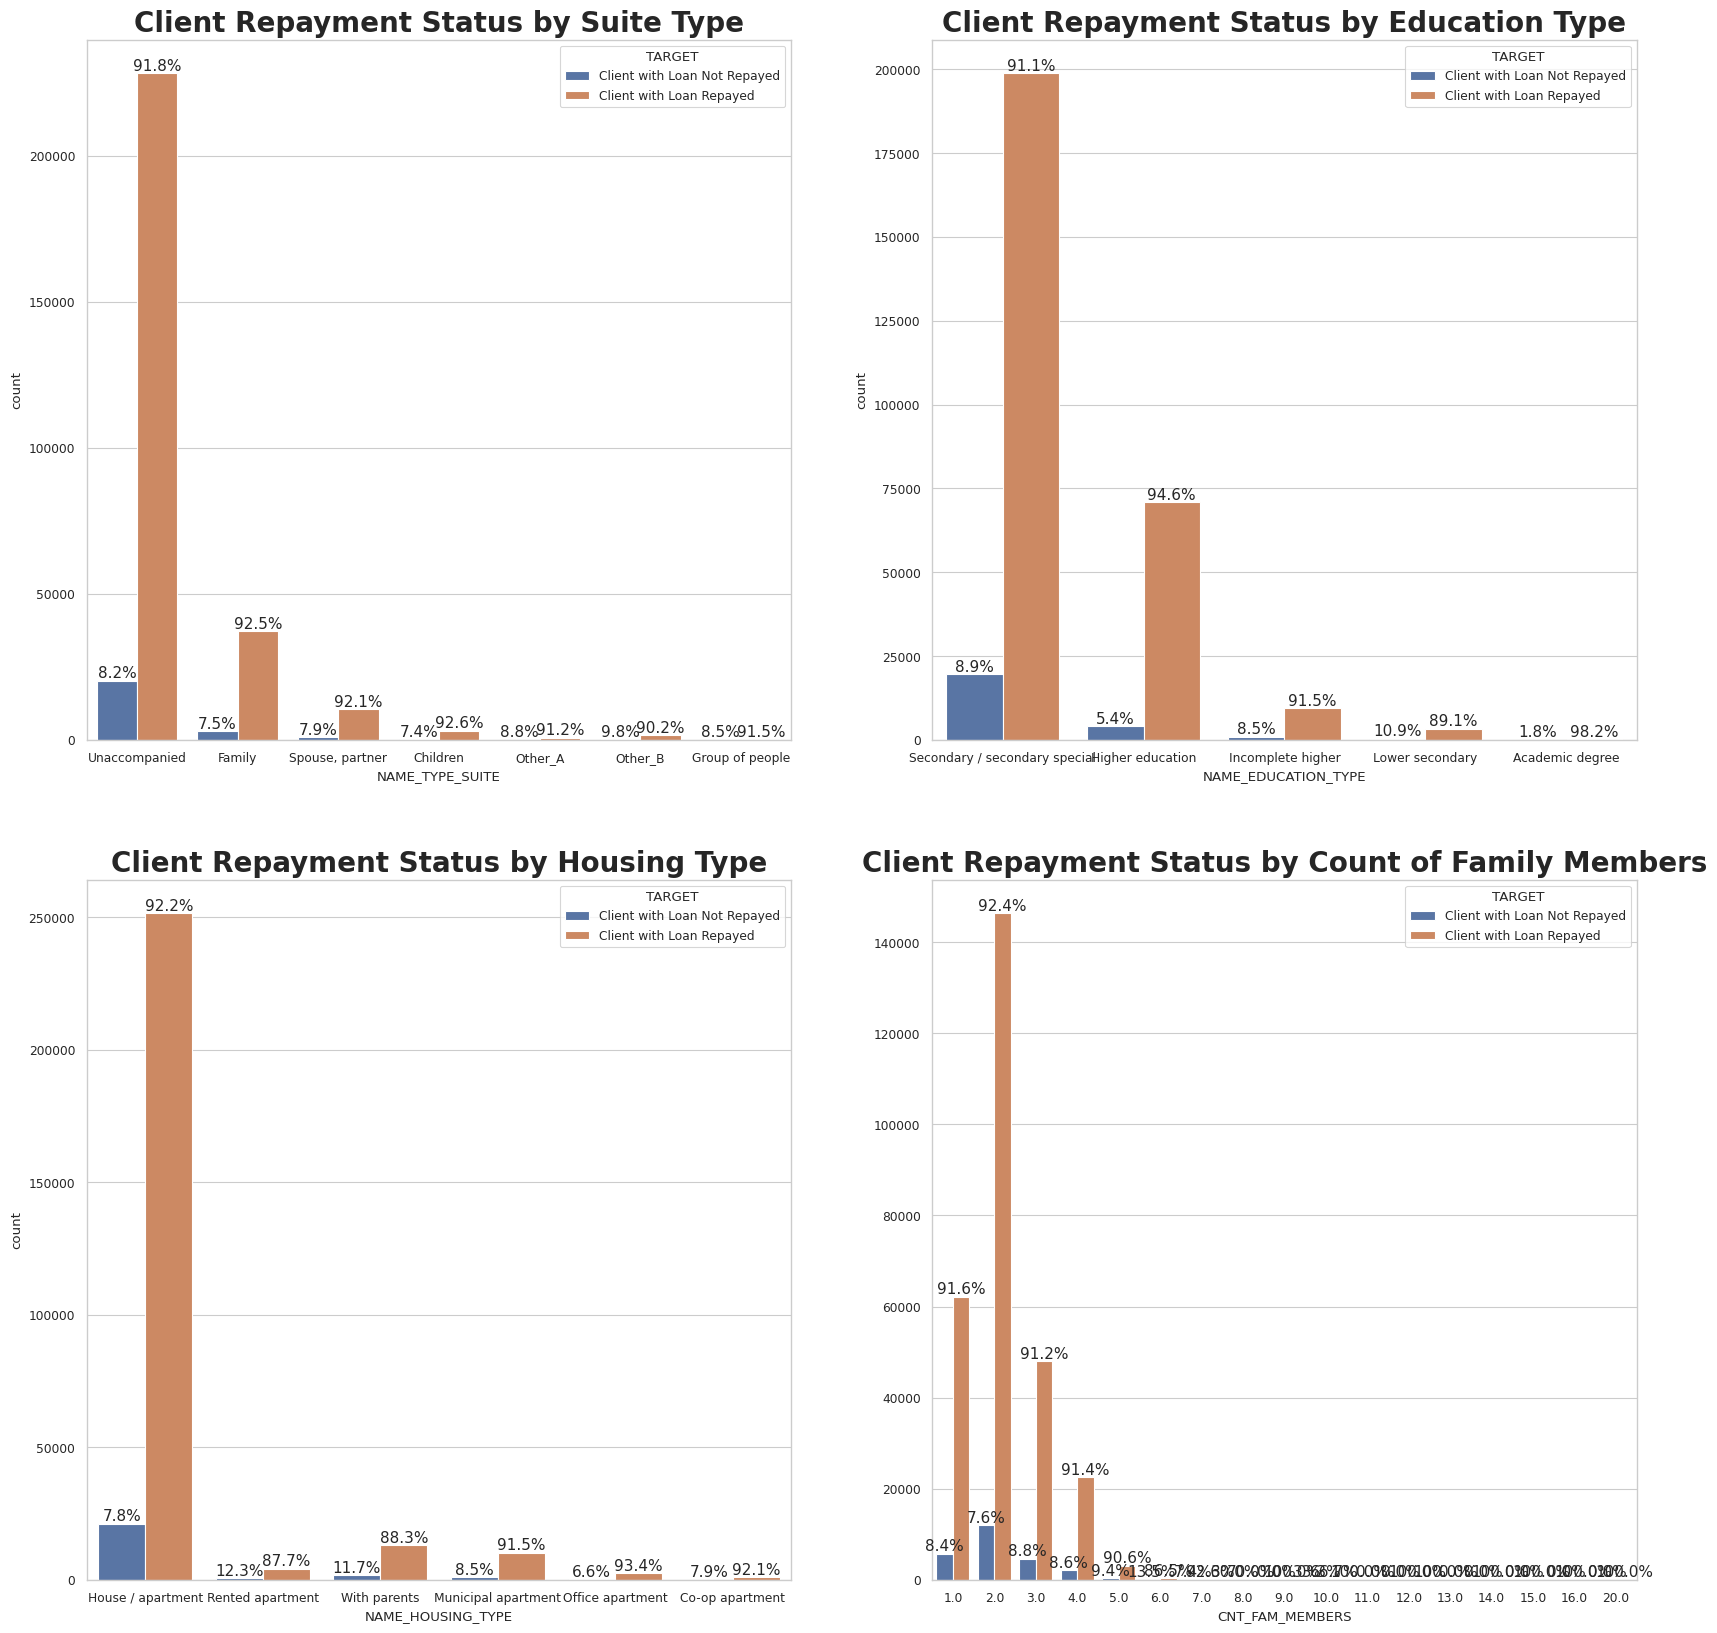

In [22]:
sns.set_style('whitegrid')
fig, ax = plt.subplots(2,2, figsize=(20,20))
sns.set_context('paper', font_scale=1)

compare_bar_plot(df_train,x_col='NAME_TYPE_SUITE',hue='TARGET',main_title="Client Repayment Status by Suite Type", ax=ax[0][0])
compare_bar_plot(df_train,x_col='NAME_EDUCATION_TYPE',hue='TARGET',main_title="Client Repayment Status by Education Type", ax=ax[0][1])
compare_bar_plot(df_train,x_col='NAME_HOUSING_TYPE',hue='TARGET',main_title="Client Repayment Status by Housing Type", ax=ax[1][0])
compare_bar_plot(df_train,x_col='CNT_FAM_MEMBERS',hue='TARGET',main_title="Client Repayment Status by Count of Family Members", ax=ax[1][1])

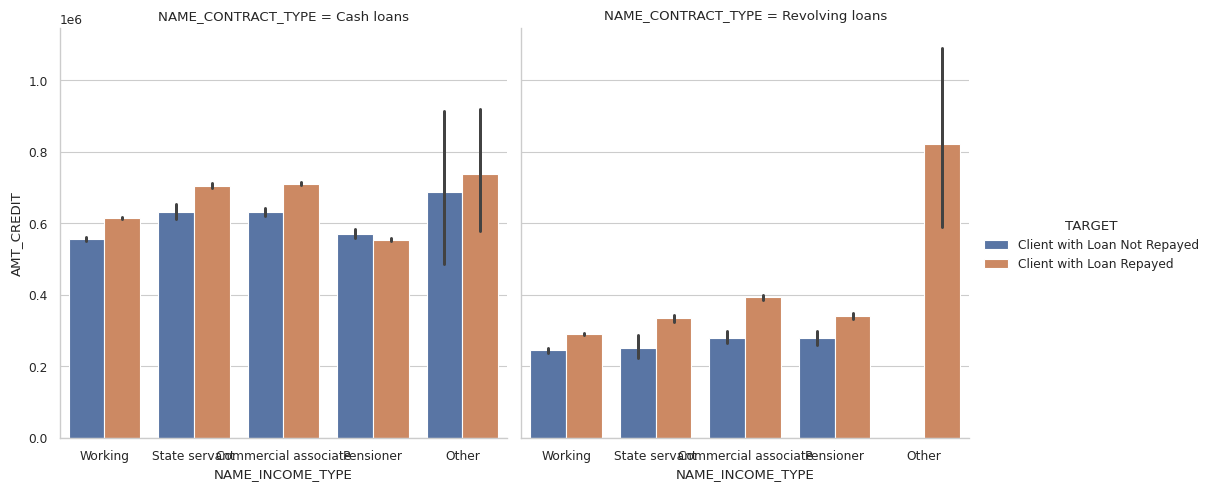

In [23]:
sns.catplot(col = 'NAME_CONTRACT_TYPE',
            y = 'AMT_CREDIT',
            hue = 'TARGET',
            x = 'NAME_INCOME_TYPE',
            kind = 'bar',
            data = df_train)

**Pensioner** with the **cash loans** type of contract are more likely to have higher amoount of credit that couldn't be repayed than the others.

While for the **other** income type with **revolving loans** are all not having problem of creedit repayment.

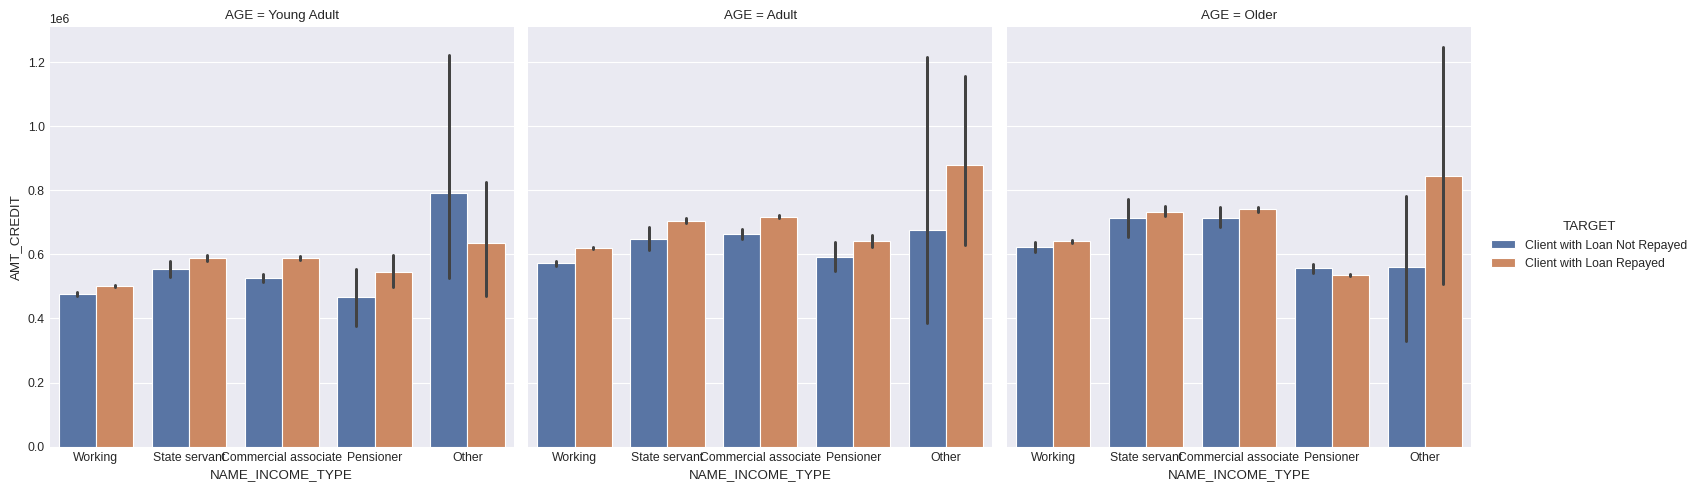

In [103]:
sns.catplot(x = 'NAME_INCOME_TYPE',
            y = 'AMT_CREDIT',
            hue = 'TARGET',
            col = 'AGE',
            kind = 'bar',
            data = df_train)

**Young adult with other income type** are most likely have a higher credit amount which have not repaid.

## Business Insights

1. Around 24K clients (9% of the total 307K clients) experienced difficulty repaying their loans.
2. More clients apply for cash loans (around 278K) than revolving loans (around 29K).
3. Around 9% of clients had difficulty paying cash loans, and around 6% of clients had difficulty paying revolving loans.
4. Women apply for loans more than men. There were around 200K loans application applied by women, and 100K loans application applied by men. However, men are more have difficulty paying loans (around 10%) compared to women (around 7%).
5. Most of clients don't own a car. Clients who own cars (around 8%) have problems paying loans compared to clients who do not own cars (around 7%).
6. Most of clients own real estate. Clients who own real estate (around 8%) have problems paying loans compared to clients who do not own real estate (around 7%).
7. Most of clients are married, followed by Single/not married. Civil marriage have the highest percentage of having problems paying loans (around 10%).
8. Most of the clients have no children, followed by have 1 children. 100% of clients who have 9 and 11 children have problems paying loans.
9. Most of the clients have 2 family members, followed by 1 (single persons). 100% of clients with family size of 11 and 13 have problems paying loans.
10. **Pensioner** with the **cash loans** type of contract are more likely to have higher amoount of credit that couldn't be repayed than the others. While for the **other** income type with **revolving loans** are all not having problem of credit repayment.
11. **Young adult with other income type** are most likely have a higher credit amount which have not repaid.
12. Most of the clients are into Professional and Technical, and then followed by Blue-Collars worker.



# Pre-Processing Data

In [24]:
print('The number of duplication is:', df_train.duplicated().sum())

The number of duplication is: 0


In [25]:
(df_train.isna().mean()*100).sort_values(ascending=False).head(70)

COMMONAREA_AVG                  69.872297
COMMONAREA_MEDI                 69.872297
COMMONAREA_MODE                 69.872297
NONLIVINGAPARTMENTS_MEDI        69.432963
NONLIVINGAPARTMENTS_AVG         69.432963
NONLIVINGAPARTMENTS_MODE        69.432963
FONDKAPREMONT_MODE              68.386172
LIVINGAPARTMENTS_MODE           68.354953
LIVINGAPARTMENTS_MEDI           68.354953
LIVINGAPARTMENTS_AVG            68.354953
FLOORSMIN_AVG                   67.848630
FLOORSMIN_MODE                  67.848630
FLOORSMIN_MEDI                  67.848630
YEARS_BUILD_MEDI                66.497784
YEARS_BUILD_AVG                 66.497784
YEARS_BUILD_MODE                66.497784
OWN_CAR_AGE                     65.990810
LANDAREA_MODE                   59.376738
LANDAREA_AVG                    59.376738
LANDAREA_MEDI                   59.376738
BASEMENTAREA_MODE               58.515956
BASEMENTAREA_MEDI               58.515956
BASEMENTAREA_AVG                58.515956
EXT_SOURCE_1                    56

In [26]:
missing_values = df_train.isna().mean()*100
col_missingvalues = missing_values[missing_values > 40].index
col_missingvalues

Index(['OWN_CAR_AGE', 'EXT_SOURCE_1', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG',
       'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG',
       'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG',
       'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG',
       'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE',
       'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE',
       'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE',
       'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE',
       'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE',
       'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI',
       'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI',
       'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI',
       'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI',
       'NONLIVINGAREA_MEDI', 'FO

In [27]:
df_train.drop(col_missingvalues, axis = 1, inplace = True)

In [28]:
df_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE
0,100002,Client with Loan Not Repayed,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Unmarried,House / apartment,0.018801,9461,637,3648.0,2120,1,1,0,1,1,0,Blue-Collars,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Corporate,0.262949,0.139376,2.0,2.0,2.0,2.0,1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,Young Adult
1,100003,Client with Loan Repayed,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,1,1,0,1,1,0,Professional and Technical,2.0,1,1,MONDAY,11,0,0,0,0,0,0,Education,0.622246,NaN,1.0,0.0,1.0,0.0,828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,Adult
2,100004,Client with Loan Repayed,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Unmarried,House / apartment,0.010032,19046,225,4260.0,2531,1,1,1,1,1,0,Blue-Collars,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,Older
3,100006,Client with Loan Repayed,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.008019,19005,3039,9833.0,2437,1,1,0,1,0,0,Blue-Collars,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Corporate,0.650442,NaN,2.0,0.0,2.0,0.0,617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,Older
4,100007,Client with Loan Repayed,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Unmarried,House / apartment,0.028663,19932,3038,4311.0,3458,1,1,0,1,0,0,Professional and Technical,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Other,0.322738,NaN,0.0,0.0,0.0,0.0,1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,Older


In [29]:
(df_train.isna().mean()*100).sort_values(ascending=False).head(50)

EXT_SOURCE_3                  19.825307
AMT_REQ_CREDIT_BUREAU_YEAR    13.501631
AMT_REQ_CREDIT_BUREAU_QRT     13.501631
AMT_REQ_CREDIT_BUREAU_MON     13.501631
AMT_REQ_CREDIT_BUREAU_WEEK    13.501631
AMT_REQ_CREDIT_BUREAU_DAY     13.501631
AMT_REQ_CREDIT_BUREAU_HOUR    13.501631
NAME_TYPE_SUITE                0.420148
OBS_30_CNT_SOCIAL_CIRCLE       0.332021
DEF_30_CNT_SOCIAL_CIRCLE       0.332021
DEF_60_CNT_SOCIAL_CIRCLE       0.332021
OBS_60_CNT_SOCIAL_CIRCLE       0.332021
EXT_SOURCE_2                   0.214626
AMT_GOODS_PRICE                0.090403
AMT_ANNUITY                    0.003902
CNT_FAM_MEMBERS                0.000650
DAYS_LAST_PHONE_CHANGE         0.000325
FLAG_DOCUMENT_8                0.000000
FLAG_DOCUMENT_2                0.000000
FLAG_DOCUMENT_3                0.000000
FLAG_DOCUMENT_4                0.000000
FLAG_DOCUMENT_5                0.000000
FLAG_DOCUMENT_6                0.000000
FLAG_DOCUMENT_7                0.000000
SK_ID_CURR                     0.000000


In [30]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 74 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  object 
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_TYPE_SUITE              306219 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

In [31]:
df_train.DAYS_LAST_PHONE_CHANGE.describe()

count    307510.000000
mean        962.858788
std         826.808487
min           0.000000
25%         274.000000
50%         757.000000
75%        1570.000000
max        4292.000000
Name: DAYS_LAST_PHONE_CHANGE, dtype: float64

In [32]:
df_train.NAME_TYPE_SUITE.value_counts()

Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

In [33]:
## Categorical Columns
cat_col = ['NAME_TYPE_SUITE']
df_train[cat_col] = df_train[cat_col].fillna(value={'NAME_TYPE_SUITE': 'Unaccompanied'})

## Numerical Columns
num_col = ['EXT_SOURCE_3','AMT_REQ_CREDIT_BUREAU_YEAR','AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_DAY',
           'AMT_REQ_CREDIT_BUREAU_HOUR','OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE','EXT_SOURCE_2',
           'AMT_GOODS_PRICE','AMT_ANNUITY','CNT_FAM_MEMBERS','DAYS_LAST_PHONE_CHANGE']
df_train[num_col] = df_train[num_col].fillna(value=df_train[num_col].median())

In [34]:
cat = df_train.select_dtypes(exclude='number').columns.tolist()
cat

['TARGET',
 'NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'ORGANIZATION_TYPE',
 'AGE']

In [35]:
df_train_copy = df_train.copy()

In [36]:
df_train_copy[cat]=df_train_copy[cat].apply(LabelEncoder().fit_transform)

In [37]:
df_train_copy.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE
0,100002,0,0,1,0,1,0,202500.0,406597.5,24700.5,351000.0,6,4,4,1,1,0.018801,9461,637,3648.0,2120,1,1,0,1,1,0,0,1.0,2,2,6,10,0,0,0,0,0,0,1,0.262949,0.139376,2.0,2.0,2.0,2.0,1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,2
1,100003,1,0,0,0,0,0,270000.0,1293502.5,35698.5,1129500.0,1,3,1,0,1,0.003541,16765,1188,1186.0,291,1,1,0,1,1,0,2,2.0,1,1,1,11,0,0,0,0,0,0,2,0.622246,0.535276,1.0,0.0,1.0,0.0,828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,100004,1,1,1,1,1,0,67500.0,135000.0,6750.0,135000.0,6,4,4,1,1,0.010032,19046,225,4260.0,2531,1,1,1,1,1,0,0,1.0,2,2,1,9,0,0,0,0,0,0,4,0.555912,0.729567,0.0,0.0,0.0,0.0,815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,100006,1,0,0,0,1,0,135000.0,312682.5,29686.5,297000.0,6,4,4,0,1,0.008019,19005,3039,9833.0,2437,1,1,0,1,0,0,0,2.0,2,2,6,17,0,0,0,0,0,0,1,0.650442,0.535276,2.0,0.0,2.0,0.0,617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,1
4,100007,1,0,1,0,1,0,121500.0,513000.0,21865.5,513000.0,6,4,4,1,1,0.028663,19932,3038,4311.0,3458,1,1,0,1,0,0,2,1.0,2,2,4,11,0,0,0,0,1,1,11,0.322738,0.535276,0.0,0.0,0.0,0.0,1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [38]:
df_train_copy.drop(['SK_ID_CURR'], inplace=True, axis=1)

In [39]:
X = df_train_copy.drop(['TARGET'], axis=1)
y = df_train_copy['TARGET']

In [40]:
# feature selection
bestfeatures = SelectKBest(score_func=chi2, k=20)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfpvalues = pd.DataFrame(fit.pvalues_)
dfcolumns = pd.DataFrame(X.columns)
featureScores = pd.concat([dfcolumns, dfscores, dfpvalues], axis = 1)
featureScores.columns = ['Features', 'Score', 'P-Values']
print('The features that correlate well with target feature:\n')
featureScores.sort_values(by=['Score'], ascending=False)

The features that correlate well with target feature:



,Features,Score,P-Values
16,DAYS_EMPLOYED,1.954124e+08,0.000000e+00
8,AMT_GOODS_PRICE,1.223080e+08,0.000000e+00
6,AMT_CREDIT,7.669987e+07,0.000000e+00
15,DAYS_BIRTH,2.235391e+06,0.000000e+00
5,AMT_INCOME_TOTAL,1.624102e+06,0.000000e+00
17,DAYS_REGISTRATION,1.348566e+06,0.000000e+00
44,DAYS_LAST_PHONE_CHANGE,6.656876e+05,0.000000e+00
18,DAYS_ID_PUBLISH,6.195946e+05,0.000000e+00
7,AMT_ANNUITY,3.913092e+05,0.000000e+00
37,ORGANIZATION_TYPE,1.770724e+03,0.000000e+00


In [41]:
# Filter features with p-value < 0.05
selected_features = featureScores[featureScores['P-Values'] < 0.05]
features = selected_features['Features'].to_list()

In [42]:
X = df_train_copy[features]

In [43]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

under_sampler = RandomOverSampler(random_state=123)

X_resampled, y_resampled = under_sampler.fit_resample(X.values, y.ravel())
Counter(y_resampled)

Counter({0: 282686, 1: 282686})

In [44]:
# Standardize Dataset Values
scaler = StandardScaler()
scaler.fit(X_resampled)
X = scaler.transform(X_resampled)
y = y_resampled

# Training ML Model

In [45]:
from sklearn.model_selection import train_test_split

# Split the training and testing data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=2106)

In [75]:
# Create an empty dataframe
summary_df = pd.DataFrame(columns=['Model', 'Accuracy (Train)', 'Accuracy (Test)', 'ROC AUC'])

## 1. Logistic Regression

In [46]:
log_reg = LogisticRegression().fit(X_train, y_train)
print(log_reg)

LogisticRegression()


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [47]:
# predict data train
y_train_pred_log = log_reg.predict(X_train)

# print classification report
print('Classification Report Training Model (Logistic Regression):')
print(classification_report(y_train, y_train_pred_log))

Classification Report Training Model (Logistic Regression):
              precision    recall  f1-score   support

           0       0.68      0.67      0.68    226068
           1       0.68      0.69      0.68    226229

    accuracy                           0.68    452297
   macro avg       0.68      0.68      0.68    452297
weighted avg       0.68      0.68      0.68    452297



In [48]:
y_pred_log = log_reg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(log_reg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.68


In [49]:
print(classification_report(y_test, y_pred_log))

              precision    recall  f1-score   support

           0       0.68      0.67      0.68     56618
           1       0.68      0.69      0.68     56457

    accuracy                           0.68    113075
   macro avg       0.68      0.68      0.68    113075
weighted avg       0.68      0.68      0.68    113075



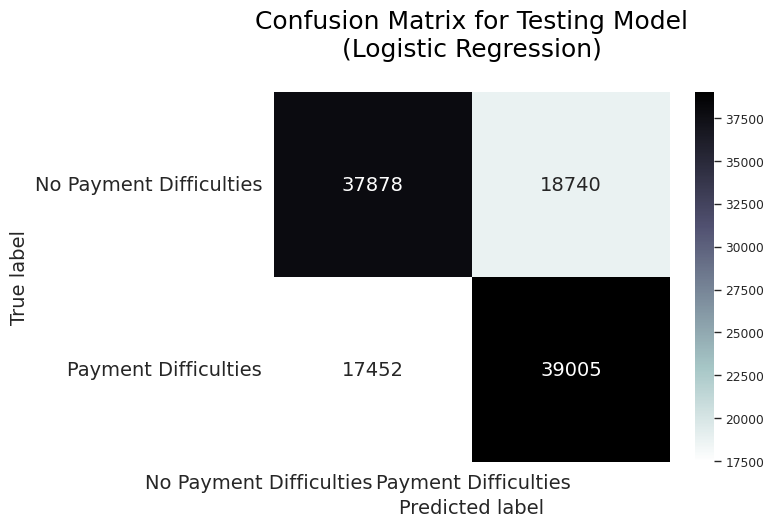

In [50]:
# form confusion matrix as a dataFrame
confusion_matrix_log = pd.DataFrame((confusion_matrix(y_test, y_pred_log)), ('No Payment Difficulties', 'Payment Difficulties'), ('No Payment Difficulties', 'Payment Difficulties'))

# plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_log, annot=True, annot_kws={'size': 14}, fmt='d', cmap='bone_r')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Testing Model\n(Logistic Regression)\n', fontsize=18, color='black')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

In [51]:
acc_log_train=round(log_reg.score(X_train,y_train)*100,2)
acc_log_test=round(log_reg.score(X_test,y_test)*100,2)
print("Training Accuracy: % {}".format(acc_log_train))
print("Test Accuracy: % {}".format(acc_log_test))

Training Accuracy: % 67.89
Test Accuracy: % 67.99


In [52]:
# ROC scores
roc_auc_log = round(roc_auc_score(y_test, y_pred_log),4)
print('ROC AUC:', roc_auc_log)

ROC AUC: 0.6799


In [76]:
# Append information to the summary dataframe
summary_df = summary_df.append({
    'Model': 'Logistic Regression',
    'Accuracy (Train)': acc_log_train,
    'Accuracy (Test)': acc_log_test,
    'ROC AUC': roc_auc_log
}, ignore_index=True)

<ipython-input-76-91a03c1727c3>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  summary_df = summary_df.append({


## 2. Decision Tree

In [53]:
dec_tree = DecisionTreeClassifier().fit(X_train, y_train)
print(dec_tree)

DecisionTreeClassifier()


In [54]:
# predict data train
y_train_pred_dt = dec_tree.predict(X_train)

# print classification report
print('Classification Report Training Model (Decision Tree):')
print(classification_report(y_train, y_train_pred_dt))

Classification Report Training Model (Decision Tree):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    226068
           1       1.00      1.00      1.00    226229

    accuracy                           1.00    452297
   macro avg       1.00      1.00      1.00    452297
weighted avg       1.00      1.00      1.00    452297



In [55]:
y_pred_dt = dec_tree.predict(X_test)
print('Accuracy of decision tree classifier on test set: {:.2f}'.format(dec_tree.score(X_test, y_test)))

Accuracy of decision tree classifier on test set: 0.95


In [56]:
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       0.91      1.00      0.96     56618
           1       1.00      0.91      0.95     56457

    accuracy                           0.95    113075
   macro avg       0.96      0.95      0.95    113075
weighted avg       0.96      0.95      0.95    113075



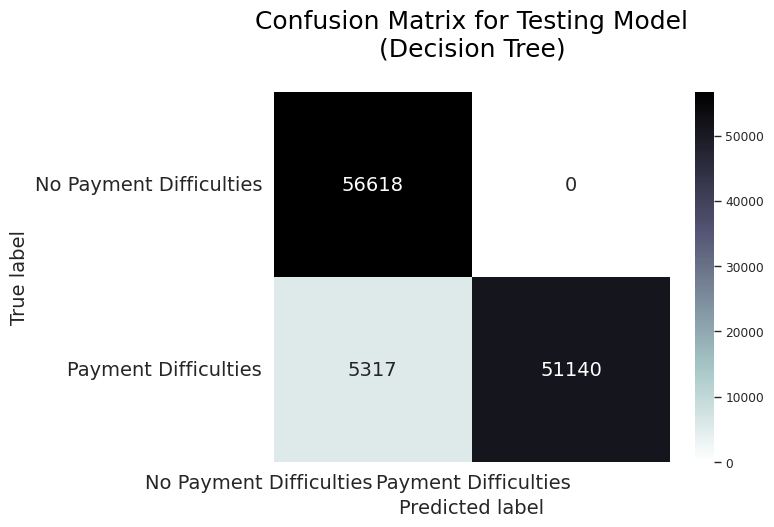

In [57]:
# form confusion matrix as a dataFrame
confusion_matrix_dt = pd.DataFrame((confusion_matrix(y_test, y_pred_dt)), ('No Payment Difficulties', 'Payment Difficulties'), ('No Payment Difficulties', 'Payment Difficulties'))

# plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_dt, annot=True, annot_kws={'size': 14}, fmt='d', cmap='bone_r')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Testing Model\n(Decision Tree)\n', fontsize=18, color='black')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

In [58]:
acc_dt_train=round(dec_tree.score(X_train,y_train)*100,2)
acc_dt_test=round(dec_tree.score(X_test,y_test)*100,2)
print("Training Accuracy: % {}".format(acc_dt_train))
print("Test Accuracy: % {}".format(acc_dt_test))

Training Accuracy: % 100.0
Test Accuracy: % 95.3


In [59]:
# ROC scores
roc_auc_dt = round(roc_auc_score(y_test, y_pred_dt),4)
print('ROC AUC:', roc_auc_dt)

ROC AUC: 0.9529


In [77]:
# Append information to the summary dataframe
summary_df = summary_df.append({
    'Model': 'Decision Tree',
    'Accuracy (Train)': acc_dt_train,
    'Accuracy (Test)': acc_dt_test,
    'ROC AUC': roc_auc_dt
}, ignore_index=True)

<ipython-input-77-8ba86c45a885>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  summary_df = summary_df.append({


## 3. Random Forest

In [60]:
rf = RandomForestClassifier().fit(X_train, y_train)
print(rf)

RandomForestClassifier()


In [61]:
# predict data train
y_train_pred_rf = rf.predict(X_train)

# print classification report
print('Classification Report Training Model (Random Forest):')
print(classification_report(y_train, y_train_pred_rf))

Classification Report Training Model (Random Forest):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    226068
           1       1.00      1.00      1.00    226229

    accuracy                           1.00    452297
   macro avg       1.00      1.00      1.00    452297
weighted avg       1.00      1.00      1.00    452297



In [62]:
y_pred_rf = rf.predict(X_test)
print('Accuracy of random forest classifier on test set: {:.2f}'.format(rf.score(X_test, y_test)))

Accuracy of random forest classifier on test set: 1.00


In [63]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56618
           1       1.00      1.00      1.00     56457

    accuracy                           1.00    113075
   macro avg       1.00      1.00      1.00    113075
weighted avg       1.00      1.00      1.00    113075



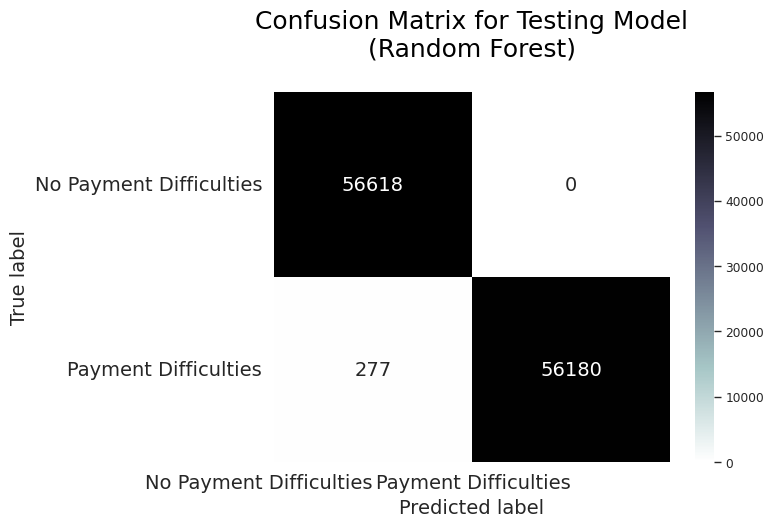

In [64]:
# form confusion matrix as a dataFrame
confusion_matrix_rf = pd.DataFrame((confusion_matrix(y_test, y_pred_rf)), ('No Payment Difficulties', 'Payment Difficulties'), ('No Payment Difficulties', 'Payment Difficulties'))

# plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_rf, annot=True, annot_kws={'size': 14}, fmt='d', cmap='bone_r')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Testing Model\n(Random Forest)\n', fontsize=18, color='black')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

In [65]:
acc_rf_train=round(rf.score(X_train,y_train)*100,2)
acc_rf_test=round(rf.score(X_test,y_test)*100,2)
print("Training Accuracy: % {}".format(acc_rf_train))
print("Test Accuracy: % {}".format(acc_rf_test))

Training Accuracy: % 100.0
Test Accuracy: % 99.76


In [66]:
# ROC scores
roc_auc_rf = round(roc_auc_score(y_test, y_pred_rf),4)
print('ROC AUC:', roc_auc_rf)

ROC AUC: 0.9975


<ipython-input-67-a88b2117f2cb>:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


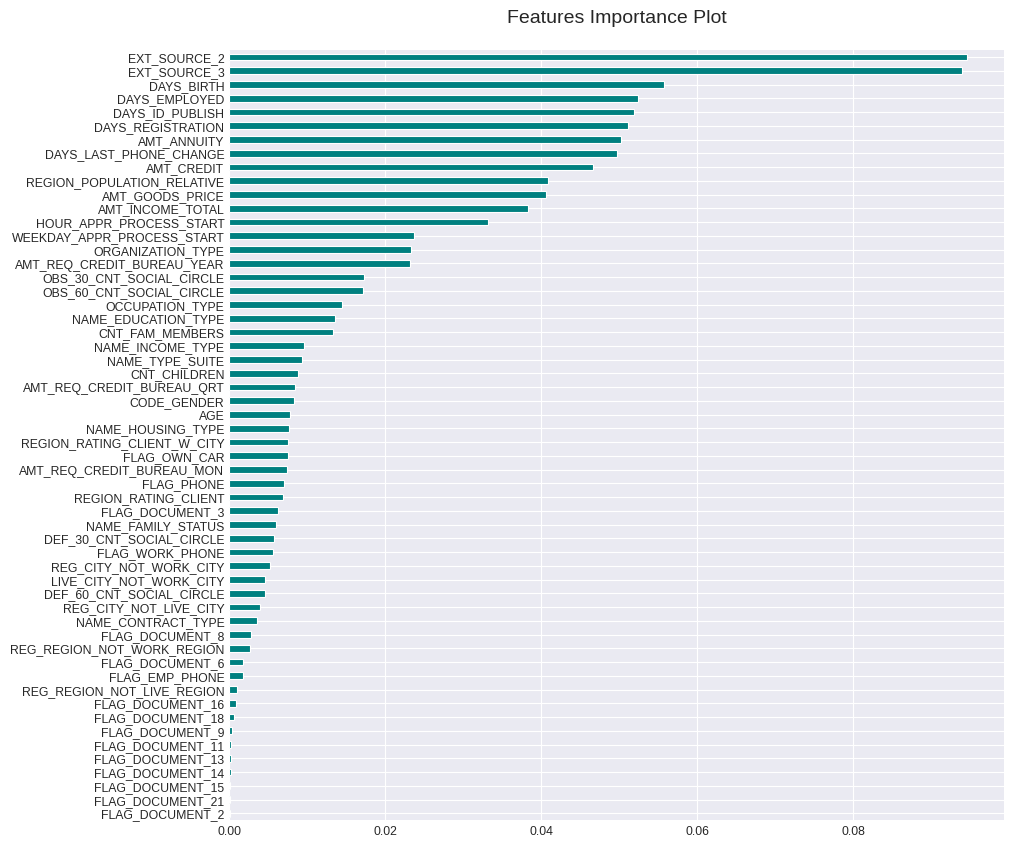

In [67]:
# important features
importances_rf = pd.Series(rf.feature_importances_, index=features).sort_values(ascending=True)

plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(10,10))
fig = importances_rf.plot(kind ='barh', color ='teal')
plt.title('Features Importance Plot\n', fontsize=14)
plt.show()

fig.figure.tight_layout()
fig.figure.savefig('top feature.png')

In [78]:
# Append information to the summary dataframe
summary_df = summary_df.append({
    'Model': 'Random Forest',
    'Accuracy (Train)': acc_rf_train,
    'Accuracy (Test)': acc_rf_test,
    'ROC AUC': roc_auc_rf
}, ignore_index=True)

<ipython-input-78-07b71aed2115>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  summary_df = summary_df.append({


## 4. Naive Bayes

In [68]:
nb = GaussianNB().fit(X_train, y_train)
print(nb)

GaussianNB()


In [69]:
# predict data train
y_train_pred_nb = nb.predict(X_train)

# print classification report
print('Classification Report Training Model (Naive Bayes):')
print(classification_report(y_train, y_train_pred_nb))

Classification Report Training Model (Naive Bayes):
              precision    recall  f1-score   support

           0       0.64      0.62      0.63    226068
           1       0.63      0.65      0.64    226229

    accuracy                           0.63    452297
   macro avg       0.63      0.63      0.63    452297
weighted avg       0.63      0.63      0.63    452297



In [70]:
y_pred_nb = nb.predict(X_test)
print('Accuracy of naive bayes classifier on test set: {:.2f}'.format(nb.score(X_test, y_test)))

Accuracy of naive bayes classifier on test set: 0.64


In [71]:
print(classification_report(y_test, y_pred_nb))

              precision    recall  f1-score   support

           0       0.64      0.62      0.63     56618
           1       0.63      0.65      0.64     56457

    accuracy                           0.64    113075
   macro avg       0.64      0.64      0.64    113075
weighted avg       0.64      0.64      0.64    113075



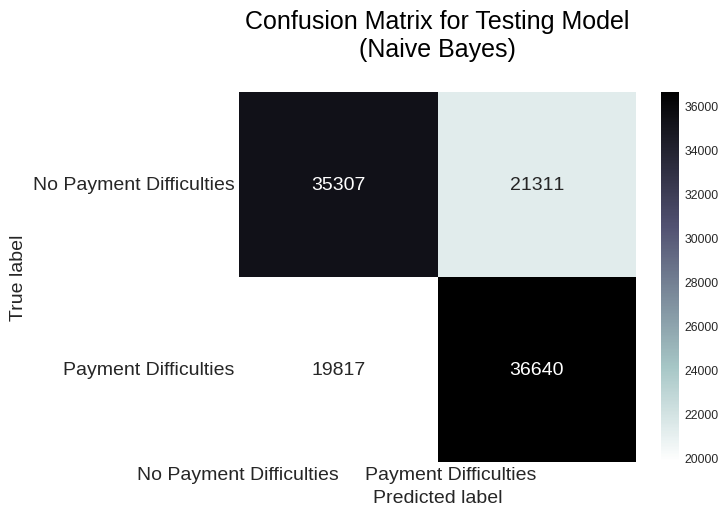

In [72]:
# form confusion matrix as a dataFrame
confusion_matrix_nb = pd.DataFrame((confusion_matrix(y_test, y_pred_nb)), ('No Payment Difficulties', 'Payment Difficulties'), ('No Payment Difficulties', 'Payment Difficulties'))

# plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_nb, annot=True, annot_kws={'size': 14}, fmt='d', cmap='bone_r')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Testing Model\n(Naive Bayes)\n', fontsize=18, color='black')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

In [73]:
acc_nb_train=round(nb.score(X_train,y_train)*100,2)
acc_nb_test=round(nb.score(X_test,y_test)*100,2)
print("Training Accuracy: % {}".format(acc_nb_train))
print("Test Accuracy: % {}".format(acc_nb_test))

Training Accuracy: % 63.45
Test Accuracy: % 63.63


In [74]:
# ROC scores
roc_auc_nb = round(roc_auc_score(y_test, y_pred_nb),4)
print('ROC AUC:', roc_auc_nb)

ROC AUC: 0.6363


In [79]:
# Append information to the summary dataframe
summary_df = summary_df.append({
    'Model': 'Naive Bayes',
    'Accuracy (Train)': acc_nb_train,
    'Accuracy (Test)': acc_nb_test,
    'ROC AUC': roc_auc_nb
}, ignore_index=True)

<ipython-input-79-0a9bd783fca5>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  summary_df = summary_df.append({


## 5. K-Nearest Neighbor

In [80]:
knn = KNeighborsClassifier().fit(X_train, y_train)
print(knn)

KNeighborsClassifier()


In [81]:
# predict data train
y_train_pred_knn = knn.predict(X_train)

# print classification report
print('Classification Report Training Model (K-Nearest Neighbor):')
print(classification_report(y_train, y_train_pred_knn))

Classification Report Training Model (K-Nearest Neighbor):
              precision    recall  f1-score   support

           0       0.86      1.00      0.92    226068
           1       1.00      0.83      0.91    226229

    accuracy                           0.92    452297
   macro avg       0.93      0.92      0.92    452297
weighted avg       0.93      0.92      0.92    452297



In [82]:
y_pred_knn = knn.predict(X_test)
print('Accuracy of K-Nearest Neighbor classifier on test set: {:.2f}'.format(knn.score(X_test, y_test)))

Accuracy of K-Nearest Neighbor classifier on test set: 0.88


In [83]:
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.81      1.00      0.90     56618
           1       1.00      0.77      0.87     56457

    accuracy                           0.88    113075
   macro avg       0.91      0.88      0.88    113075
weighted avg       0.90      0.88      0.88    113075



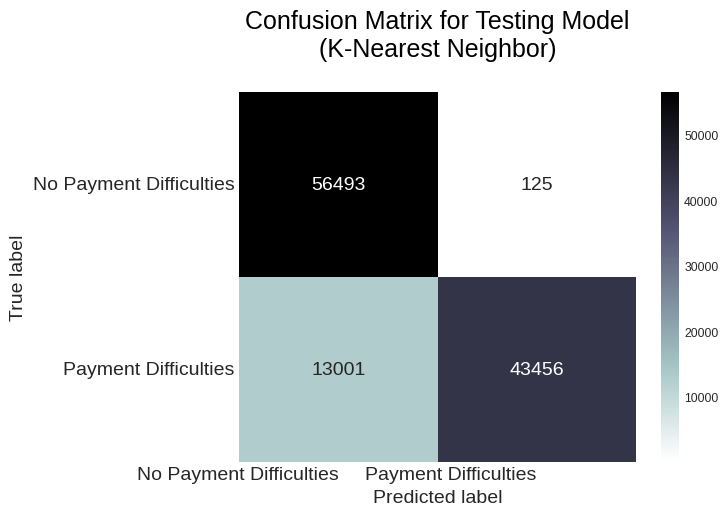

In [84]:
# form confusion matrix as a dataFrame
confusion_matrix_knn = pd.DataFrame((confusion_matrix(y_test, y_pred_knn)), ('No Payment Difficulties', 'Payment Difficulties'), ('No Payment Difficulties', 'Payment Difficulties'))

# plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_knn, annot=True, annot_kws={'size': 14}, fmt='d', cmap='bone_r')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Testing Model\n(K-Nearest Neighbor)\n', fontsize=18, color='black')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

In [86]:
acc_knn_train=round(knn.score(X_train,y_train)*100,2)
acc_knn_test=round(knn.score(X_test,y_test)*100,2)
print("Training Accuracy: % {}".format(acc_knn_train))
print("Test Accuracy: % {}".format(acc_knn_test))

Training Accuracy: % 91.72
Test Accuracy: % 88.39


In [87]:
# ROC scores
roc_auc_knn = round(roc_auc_score(y_test, y_pred_knn),4)
print('ROC AUC:', roc_auc_knn)

ROC AUC: 0.8838


In [88]:
# Append information to the summary dataframe
summary_df = summary_df.append({
    'Model': 'K-Nearest Neighbor',
    'Accuracy (Train)': acc_knn_train,
    'Accuracy (Test)': acc_knn_test,
    'ROC AUC': roc_auc_knn
}, ignore_index=True)

<ipython-input-88-e133c8f928b5>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  summary_df = summary_df.append({


## 6. Neural Network

In [89]:
nn = MLPClassifier().fit(X_train, y_train)
print(nn)

MLPClassifier()


In [90]:
# predict data train
y_train_pred_nn = nn.predict(X_train)

# print classification report
print('Classification Report Training Model (Neural Network):')
print(classification_report(y_train, y_train_pred_nn))

Classification Report Training Model (Neural Network):
              precision    recall  f1-score   support

           0       0.72      0.76      0.74    226068
           1       0.75      0.71      0.73    226229

    accuracy                           0.73    452297
   macro avg       0.73      0.73      0.73    452297
weighted avg       0.73      0.73      0.73    452297



In [91]:
y_pred_nn = nn.predict(X_test)
print('Accuracy of Neural Network classifier on test set: {:.2f}'.format(nn.score(X_test, y_test)))

Accuracy of Neural Network classifier on test set: 0.72


In [92]:
print(classification_report(y_test, y_pred_nn))

              precision    recall  f1-score   support

           0       0.71      0.75      0.73     56618
           1       0.73      0.69      0.71     56457

    accuracy                           0.72    113075
   macro avg       0.72      0.72      0.72    113075
weighted avg       0.72      0.72      0.72    113075



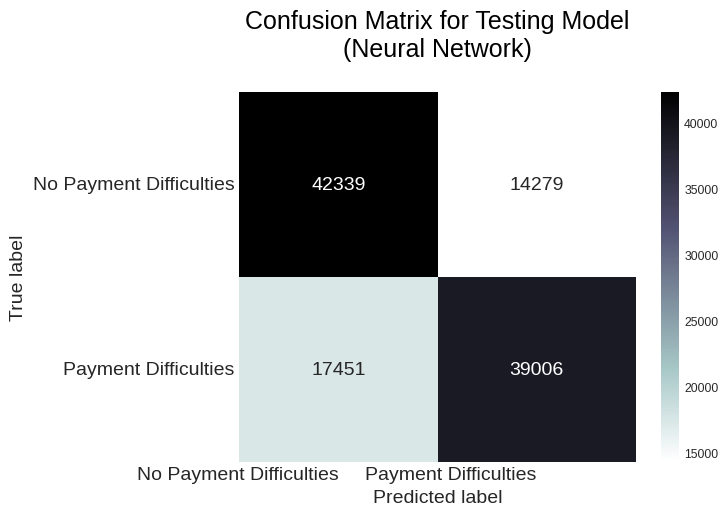

In [93]:
# form confusion matrix as a dataFrame
confusion_matrix_nn = pd.DataFrame((confusion_matrix(y_test, y_pred_nn)), ('No Payment Difficulties', 'Payment Difficulties'), ('No Payment Difficulties', 'Payment Difficulties'))

# plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_nn, annot=True, annot_kws={'size': 14}, fmt='d', cmap='bone_r')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Testing Model\n(Neural Network)\n', fontsize=18, color='black')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

In [94]:
acc_nn_train=round(nn.score(X_train,y_train)*100,2)
acc_nn_test=round(nn.score(X_test,y_test)*100,2)
print("Training Accuracy: % {}".format(acc_nn_train))
print("Test Accuracy: % {}".format(acc_nn_test))

Training Accuracy: % 73.35
Test Accuracy: % 71.94


In [95]:
# ROC scores
roc_auc_nn = round(roc_auc_score(y_test, y_pred_nn),4)
print('ROC AUC:', roc_auc_nn)

ROC AUC: 0.7193


In [96]:
# Append information to the summary dataframe
summary_df = summary_df.append({
    'Model': 'Neural Network',
    'Accuracy (Train)': acc_nn_train,
    'Accuracy (Test)': acc_nn_test,
    'ROC AUC': roc_auc_nn
}, ignore_index=True)

<ipython-input-96-0285de8d23df>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  summary_df = summary_df.append({


In [99]:
summary_df = summary_df.sort_values(by='ROC AUC', ascending=False)
summary_df

,Model,Accuracy (Train),Accuracy (Test),ROC AUC
2,Random Forest,100.00,99.76,0.9975
1,Decision Tree,100.00,95.30,0.9529
4,K-Nearest Neighbor,91.72,88.39,0.8838
5,Neural Network,73.35,71.94,0.7193
0,Logistic Regression,67.89,67.99,0.6799
3,Naive Bayes,63.45,63.63,0.6363
